In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import SGD
import matplotlib.pyplot as plt

import os

from keras.callbacks import EarlyStopping

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

In [4]:
#compile the model
opt = SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#create data generators
train_datagen = ImageDataGenerator(
rescale=1.0/255.0,
featurewise_center=True,
featurewise_std_normalization=True)

valid_datagen = ImageDataGenerator(
rescale=1.0/255.0,
featurewise_center=True,
featurewise_std_normalization=True)

In [6]:
#prepare iterators
batch_size=32
train_it = train_datagen.flow_from_directory('C:\\Users\\spenc\\Desktop\\CapstonB_Dataset\\OriginalData\\Train',
                                             classes=('Normal', 'Cancer'), 
                                             batch_size=batch_size, 
                                             target_size=(224,224))

Found 67239 images belonging to 2 classes.


In [7]:
valid_it = valid_datagen.flow_from_directory("C:\\Users\\spenc\\Desktop\\CapstonB_Dataset\\OriginalData\\Validation",
                                             classes=('Normal', 'Cancer'), 
                                             batch_size=batch_size, 
                                             target_size=(224,224))

Found 18929 images belonging to 2 classes.


In [8]:
#model history
es = EarlyStopping(monitor='val_loss', patience=8)
epochs=100
history = model.fit(train_it, steps_per_epoch=len(train_it),
                             validation_data=valid_it, 
                              validation_steps=len(valid_it),
                             epochs=epochs, callbacks=[es])

C:\Users\spenc\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\spenc\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
2102/2102 [==============================] - 5974s 3s/step - loss: 0.5939 - accuracy: 0.7119 - val_loss: 0.6644 - val_accuracy: 0.6458
Epoch 2/100
2102/2102 [==============================] - 6082s 3s/step - loss: 0.5767 - accuracy: 0.7184 - val_loss: 0.6522 - val_accuracy: 0.6460
Epoch 3/100
2102/2102 [==============================] - 6148s 3s/step - loss: 0.5483 - accuracy: 0.7301 - val_loss: 0.6419 - val_accuracy: 0.6426
Epoch 4/100
1860/2102 [=========================>....] - ETA: 9:58 - loss: 0.5115 - accuracy: 0.7482 

KeyboardInterrupt: 

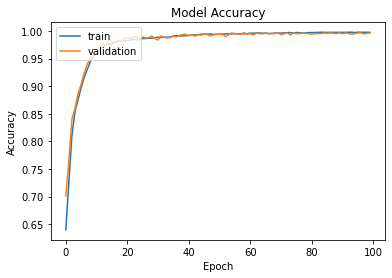

In [43]:
#Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [44]:
model.save('CapstoneCNN_PatientSplit_NoAug.h5')

# Metrics
* <span style="color:blue">Precision</span> = TP/(TP+FP)
    * Out of the **predicted positives**, how many are actual positive
* <span style="color:blue">Recall</span> = TP/(TP+FN) 
    * Out of the **actual positive**, how many positives were identified
* <span style="color:blue">F1 score</span> score combines precision and recall
    * 2 * (Precison x Recall)/(Precision + Recall)

# ROC Curve
* **ROC** = reciever operating curve
* Increasing the **threshold** will <span style='color:red'>increase the precision</span> (less false positives) but <span style='color:red'>decrease the recall</span> (some true positives will be missed)
* ROC has true positive rate (**TPR**) on **y axis** and false positive rate (**FPR**) on **x axis**
    * want to aim for values in **upper left** (high TPR and low FPR)
* want higher area under the ROC curve

# Evaluate on test set

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, \
    recall_score, f1_score, precision_score, roc_auc_score

import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd

In [33]:
import os

In [7]:
model_test = keras.models.load_model('CapstoneCNN_One.h5')

In [8]:
batch_size = 32
test_datagen = ImageDataGenerator(
rescale=1.0/255.0,
featurewise_center=True,
featurewise_std_normalization=True)

In [9]:
test_it = test_datagen.flow_from_directory("C:\\Users\\spenc\\Desktop\\CapstoneA_Dataset\\Combined_Augmented_Dataset\\Validation",
                                             classes=('Normal', 'Cancer'), 
                                             batch_size=batch_size, 
                                             target_size=(224,224),
                                           shuffle=False)

Found 1651 images belonging to 2 classes.


In [10]:
y_true = test_it.classes

In [11]:
#Normal = 0, Cancer=1
y_true

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
y_pred = model_test.predict(test_it, steps=len(test_it), verbose=1)

C:\Users\spenc\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\spenc\anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


52/52 [==============================] - 87s 2s/step


In [14]:
#probability of being cancer
y_pred_prob = y_pred[:, 1]
y_pred_prob[:5]

array([0.00035504, 0.00035504, 0.00035504, 0.00035504, 0.00035504],
      dtype=float32)

In [15]:
#label of whether is cancer using threshod of 0.5
y_pred_binary = y_pred_prob > 0.5
y_pred_binary[:5]

array([False, False, False, False, False])

In [16]:
print(confusion_matrix(y_true, y_pred_binary))

[[975   0]
 [  6 670]]


In [17]:
accuracy = accuracy_score(y_true, y_pred_binary)
accuracy

0.9963658388855239

In [18]:
precision = precision_score(y_true, y_pred_binary)
precision

1.0

In [19]:
recall = recall_score(y_true, y_pred_binary)
print(recall)

0.9911242603550295


In [20]:
f1 = f1_score(y_true, y_pred_binary)
f1

0.9955423476968795

In [21]:
auc = roc_auc_score(y_true, y_pred_binary)
auc

0.9955621301775148

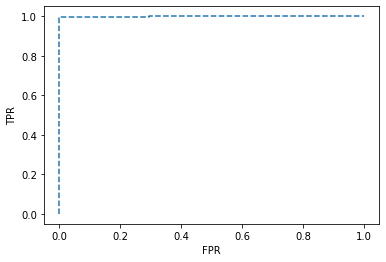

In [22]:
# calculate roc curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.plot(fpr, tpr, linestyle='--', label='')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [32]:
output_results = pd.DataFrame()
output_results['ImageDir'] = test_it.filenames
output_results['Prediction'] = y_pred_binary
output_results['PatientID'] = np.arange(1234, 1234+output_results.shape[0])
output_results.head()

,ImageDir,Prediction,PatientID
0,Normal\DBT-P00032_lcc34.JPEG,False,1234
1,Normal\DBT-P00032_rcc33.JPEG,False,1235
2,Normal\DBT-P00045_rmlo29.JPEG,False,1236
3,Normal\DBT-P00052_rmlo33.JPEG,False,1237
4,Normal\DBT-P00076_lmlo33.JPEG,False,1238


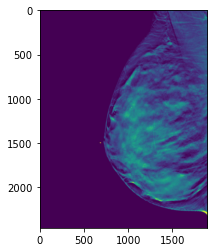

In [36]:
#How to display an image
base_dir = "C:\\Users\\spenc\\Desktop\\CapstoneA_Dataset\\Combined_Augmented_Dataset\\Validation"
image = plt.imread(os.path.join(base_dir, output_results.loc[0,'ImageDir']))
plt.imshow(image)
plt.show()